<a href="https://colab.research.google.com/github/AlineEmmer/Machine-Learning/blob/main/Machine_learning_Diabetes_Dyslipidemia_Prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##In this project, a database containing infrared spectra of patients was analyzed: group 0 = patients with mixed dyslipidemia (n=100), group 1 = patients with diabetes (n=100), group 2 = patients with hypercholesterolemia (n=100 ), group 3 = patients with hypertriglyceridemia (n=100), group 4-healthy volunteers (n=100), group 5= patients with pre-diabetes (n=100). The goal is to develop a machine learning model to predict diabetes and dyslipidemia and to identify wavenumbers associated with these diseases, with a view to optimizing the diagnosis

In [1]:
# Task to be performed
# Step 1: Import the database
# Step 2: Import the Pandas library to help manipulate the database
# Step 3: Installing the Pycaret library (helps to perform Auto-Machine Learn)
# Step 4: Importing the Pycaret library
# Step 5: Pre-processing the data
# Step 6: Building and comparing different models
# Step 7: Training the best model based on predictive performance metrics
# Step 8: Extracting the metrics results from the model
# Step 9: Conclusions about the model
# Step 10: Saving the model to make predictions in real life (Deploy)

In [2]:
# Step 1: Import the database
from google.colab import files
uploaded = files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [3]:
# Step 2: Import the Pandas library to help manipulate the database
import pandas as pd
df1 = pd.read_excel("Dataset.xlsx")
display (df1)

,Classes,3998.4,3997,3995.6,3994.2,3992.8,3991.3,3989.9,3988.5,3987.1,...,412.3,410.9,409.5,408.1,406.6,405.2,403.8,402.4,401,399.6
0,PREDM,0.9979,0.9973,0.9970,0.9970,0.9972,0.9972,0.9971,0.9970,0.9970,...,0.2580,0.2571,0.2563,0.2561,0.2565,0.2568,0.2565,0.2554,0.2541,0.2538
1,PREDM,0.9976,0.9973,0.9971,0.9971,0.9969,0.9965,0.9961,0.9963,0.9968,...,0.2561,0.2537,0.2523,0.2527,0.2539,0.2548,0.2545,0.2532,0.2515,0.2503
2,PREDM,0.9973,0.9968,0.9966,0.9966,0.9969,0.9970,0.9970,0.9970,0.9970,...,0.2556,0.2558,0.2565,0.2579,0.2595,0.2607,0.2609,0.2594,0.2558,0.2508
3,PREDM,0.9969,0.9964,0.9962,0.9964,0.9967,0.9968,0.9966,0.9966,0.9968,...,0.2558,0.2554,0.2550,0.2551,0.2558,0.2567,0.2567,0.2550,0.2517,0.2478
4,PREDM,0.9979,0.9974,0.9969,0.9966,0.9966,0.9966,0.9966,0.9967,0.9969,...,0.2559,0.2545,0.2534,0.2532,0.2541,0.2550,0.2552,0.2548,0.2545,0.2551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,DYS,0.9959,0.9956,0.9953,0.9951,0.9953,0.9956,0.9958,0.9957,0.9954,...,0.2691,0.2686,0.2678,0.2674,0.2675,0.2671,0.2657,0.2639,0.2630,0.2630
596,DYS,0.9964,0.9964,0.9960,0.9955,0.9952,0.9950,0.9950,0.9948,0.9945,...,0.2653,0.2648,0.2659,0.2674,0.2684,0.2680,0.2664,0.2651,0.2651,0.2664
597,DYS,0.9958,0.9958,0.9957,0.9957,0.9959,0.9961,0.9961,0.9959,0.9954,...,0.2715,0.2713,0.2708,0.2700,0.2684,0.2662,0.2641,0.2626,0.2620,0.2627
598,DYS,0.9964,0.9960,0.9955,0.9953,0.9954,0.9958,0.9961,0.9962,0.9959,...,0.2687,0.2672,0.2671,0.2681,0.2692,0.2695,0.2689,0.2675,0.2656,0.2641


In [4]:
# Step 3: Installing the Pycaret library (helps to perform Auto-Machine Learn)
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.6 MB/s eta 0:00:0

In [5]:
# Step 4: Importing the classification library from PyCaret
from pycaret import classification


In [6]:
# Step 5: Pre-processing the data
classification_setup = classification.setup(data = df1, target = "Classes")

,Description,Value
0,Session id,5695
1,Target,Classes
2,Target type,Multiclass
3,Target mapping,"DM2: 0, DYS: 1, HC: 2, HT: 3, Healthy: 4, PREDM: 5"
4,Original data shape,"(600, 2542)"
5,Transformed data shape,"(600, 2542)"
6,Transformed train set shape,"(420, 2542)"
7,Transformed test set shape,"(180, 2542)"
8,Numeric features,2541
9,Preprocess,True


In [7]:
# Step 6: Building and comparing different models
best = classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9905,0.9999,0.9905,0.9917,0.9904,0.9886,0.9888,1.6020
lda,Linear Discriminant Analysis,0.9905,1.0000,0.9905,0.9917,0.9904,0.9886,0.9888,1.3110
et,Extra Trees Classifier,0.9905,0.9999,0.9905,0.9911,0.9905,0.9886,0.9887,1.4170
dt,Decision Tree Classifier,0.9833,0.9900,0.9833,0.9867,0.9829,0.9800,0.9808,1.1340
gbc,Gradient Boosting Classifier,0.9762,0.9996,0.9762,0.9793,0.9760,0.9714,0.9721,98.1040
xgboost,Extreme Gradient Boosting,0.9762,0.9992,0.9762,0.9783,0.9761,0.9714,0.9719,12.4280
lightgbm,Light Gradient Boosting Machine,0.9762,0.9998,0.9762,0.9804,0.9758,0.9714,0.9724,16.0980
knn,K Neighbors Classifier,0.9595,0.9939,0.9595,0.9639,0.9593,0.9514,0.9524,0.7010
nb,Naive Bayes,0.9571,0.9830,0.9571,0.9630,0.9566,0.9486,0.9499,0.8810
ridge,Ridge Classifier,0.9286,0.0000,0.9286,0.9444,0.9261,0.9143,0.9183,0.9290


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [8]:
# Step 7: Training the best model based on predictive performance metrics
# Note: The Random forest was the top of them. Now, we will create and validate this model
best_model = classification.create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,0.9986,0.9524,0.9524,0.9524,0.9429,0.9429
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9762,1.0000,0.9762,0.9792,0.9761,0.9714,0.9721


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
# Step 8: Extracting the metrics results from the model
classification.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

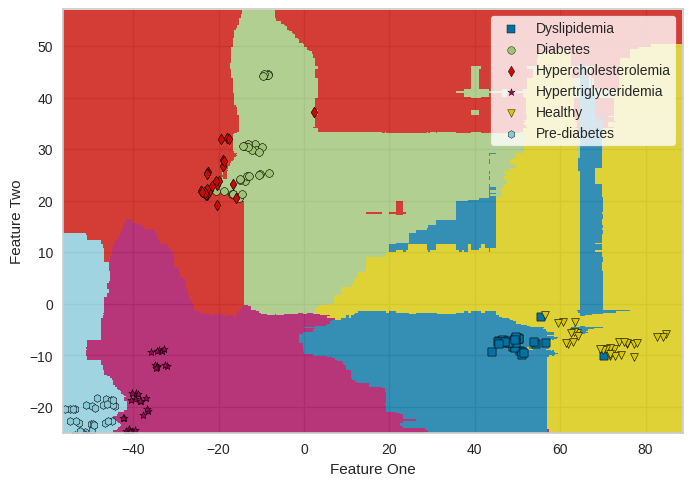

In [10]:
#Plotting the decision boundary plot
classification.plot_model(best_model, plot ="boundary", plot_kwargs ={'classes': ["Dyslipidemia", "Diabetes", "Hypercholesterolemia", 
                                                                                  "Hypertriglyceridemia", "Healthy", "Pre-diabetes"]})


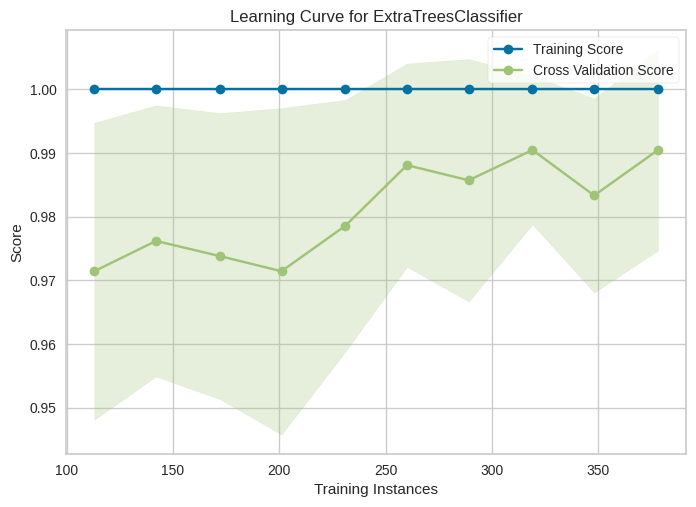

In [11]:
# Plotting the learning curve
classification.plot_model(best_model, plot ="learning")

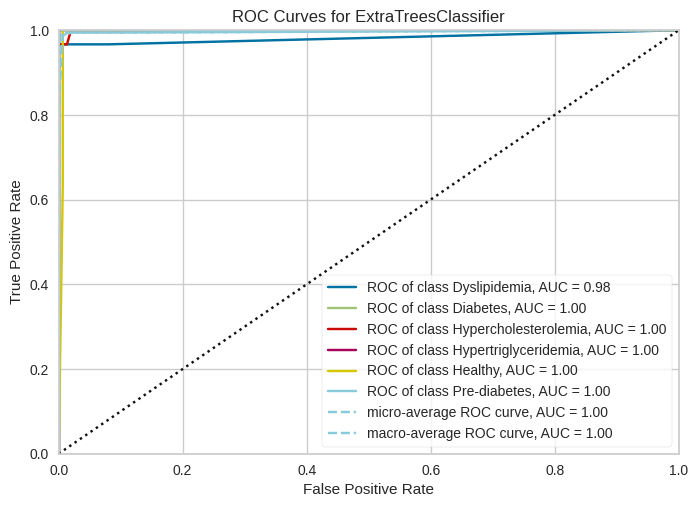

'AUC.png'

In [12]:
#Plotting the ROC curves
classification.plot_model(best_model, plot ="auc", plot_kwargs ={'classes': ["Dyslipidemia", "Diabetes",
                                                                           "Hypercholesterolemia", "Hypertriglyceridemia", "Healthy", "Pre-diabetes"]})
classification.plot_model(best_model, plot ="auc", plot_kwargs ={'classes': ["Dyslipidemia", "Diabetes",
                                                                           "Hypercholesterolemia", "Hypertriglyceridemia", "Healthy", "Pre-diabetes"]}, scale = 6, save = True)

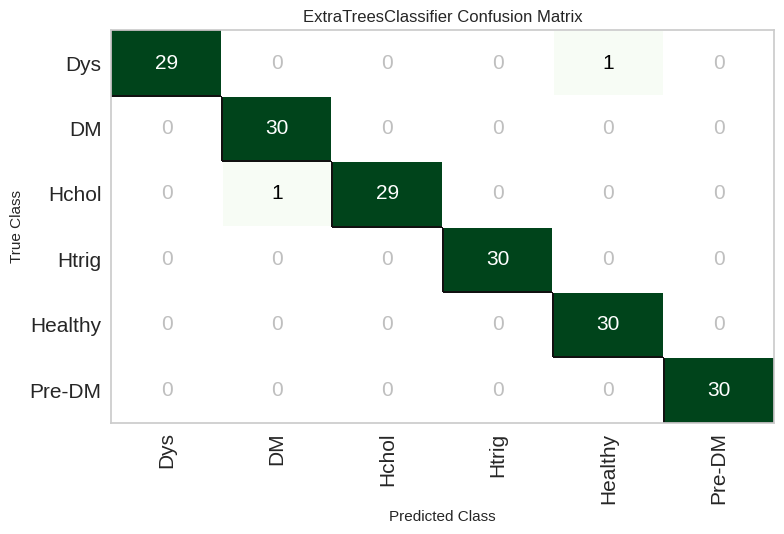

In [13]:
# Plotting de confusion matrix graph
classification.plot_model(best_model, plot ="confusion_matrix", plot_kwargs ={'classes': ["Dys", "DM", "Hchol", "Htrig", "Healthy", "Pre-DM"]})

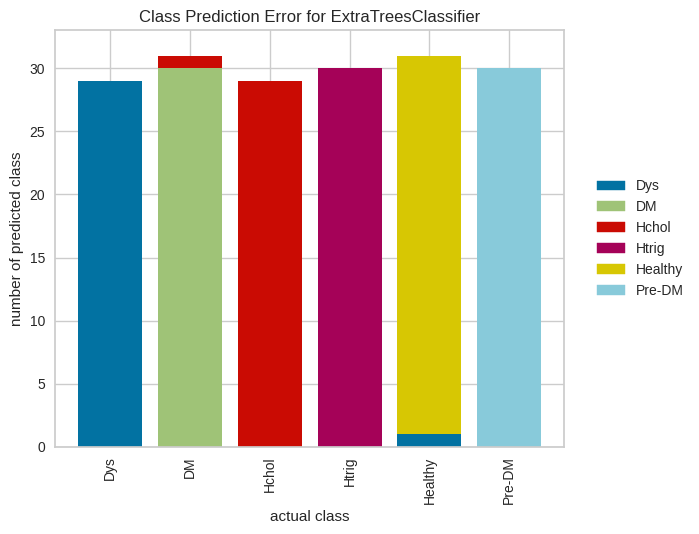

In [14]:
# Compare predictions and results of the model
classification.plot_model(best_model, plot ="error", plot_kwargs ={'classes': ["Dys", "DM", "Hchol", "Htrig", "Healthy", "Pre-DM"]})

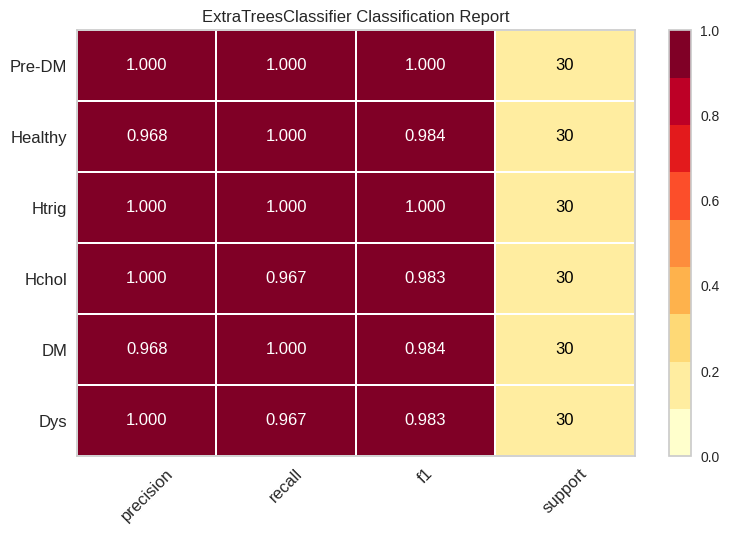

'Class Report.png'

In [15]:
# Figures of merit of the model
classification.plot_model(best_model, plot ="class_report", plot_kwargs ={'classes': ["Dys", "DM", "Hchol", "Htrig", "Healthy", "Pre-DM"]})
classification.plot_model(best_model, plot ="class_report", plot_kwargs ={'classes': ["Dys", "DM", "Hchol", "Htrig", "Healthy", "Pre-DM"]}, 
                          scale = 6, save = True)

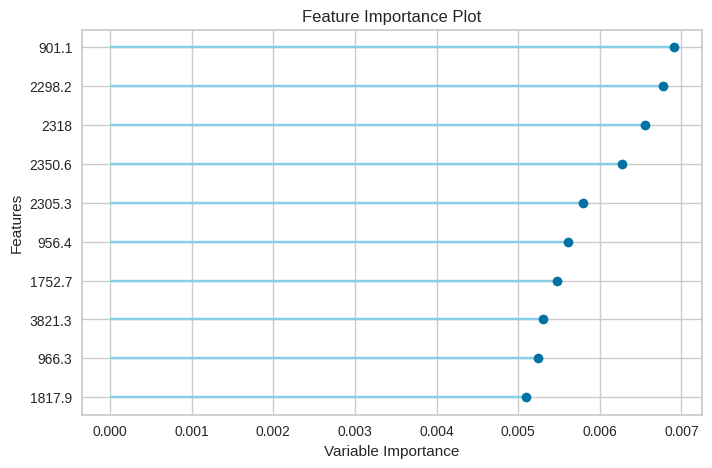

'Feature Importance.png'

In [16]:
# Plotting only the TOP 10 most important wavenumber
classification.plot_model(best_model, plot ="feature")
classification.plot_model(best_model, plot ="feature", scale = 6, save = True)

In [17]:
# Training the best model based on predictive performance metrics
# Note: The et model was one of the top three. Now, we will create and validate this.
best_model = classification.create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9762,0.9986,0.9762,0.9792,0.9761,0.9714,0.9721
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9762,1.0000,0.9762,0.9792,0.9761,0.9714,0.9721
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

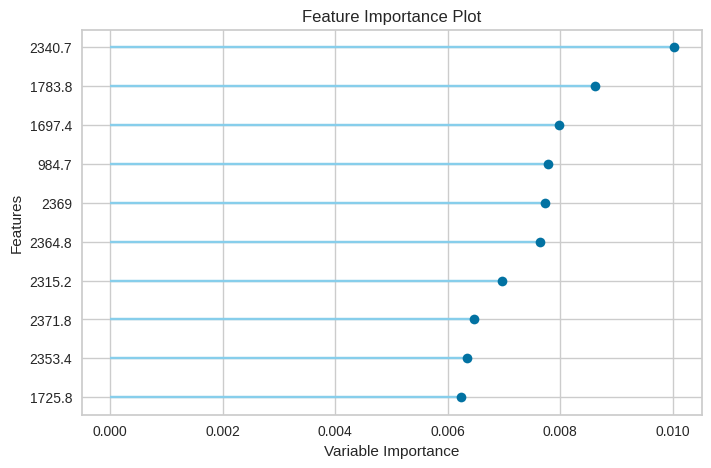

'Feature Importance.png'

In [18]:
# Plotting only the TOP 10 most important wavenumber
classification.plot_model(best_model, plot ="feature")
classification.plot_model(best_model, plot ="feature", scale = 3, save = True)

In [19]:
# Training the best model based on predictive performance metrics
# Note: The PLS-DA model was one of the top three. Now, we will create and validate the Linear Discriminant Analysis model
best_model = classification.create_model("lda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9762,1.0000,0.9762,0.9792,0.9761,0.9714,0.9721
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9762,1.0000,0.9762,0.9792,0.9761,0.9714,0.9721
5,0.9762,1.0000,0.9762,0.9792,0.9761,0.9714,0.9721
6,0.9762,1.0000,0.9762,0.9792,0.9761,0.9714,0.9721
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

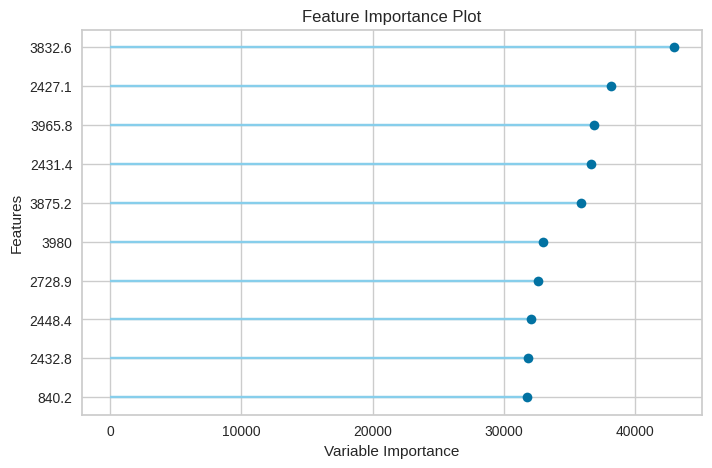

'Feature Importance.png'

In [20]:
# Plotting only the TOP 10 most important wavenumber
classification.plot_model(best_model, plot ="feature")
classification.plot_model(best_model, plot ="feature", scale = 3, save = True)

In [ ]:
#Step 9: Conclusions about the model:
# The random forest was the best model, with almost 100% of accuracy
# The top wavenumbers were: 

In [21]:
# Passo 11: Saving the model for predictions (Deploy)
classification.save_model(best_model, "best_model_et")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['3998.4', '3997', '3995.6',
                                              '3994.2', '3992.8', '3991.3',
                                              '3989.9', '3988.5', '3987.1',
                                              '3985.7', '3984.3', '3982.8',
                                              '3981.4', '3980', '3978.6...
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
          